In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from html.parser import HTMLParser #https://docs.python.org/3/library/html.parser.html
from bs4 import BeautifulSoup
import time

In [2]:
time.time()

1715804520.7558348

In [3]:
df = pd.read_pickle('webdata_27.pkl') # put in the path for your labels - file here
df_eye = pd.read_csv("test.csv") # Enter your eye tracking csv here
df_time = pd.read_csv("test_time.csv")  # Enter you eye tracking time csv here

# TODO: convert all timestamps to UNIX
# Bring first timestamp to 0

In [ ]:
df.head()

In [6]:
df.CurrentTimstamp

0      1713773645549
1      1713773654449
2      1713773656081
3      1713773658491
4      1713773662019
           ...      
794    1713776499934
795    1713776501064
796    1713776504945
797    1713776506166
798    1713776508580
Name: CurrentTimstamp, Length: 799, dtype: int64

In [7]:
df

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml
0,1713773645549,load,,0.0,0.0,https://www.amazon.com/s?k=drone&crid=2QM4GH5R...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:06,"<body> <a href=""/ref=cs_503_logo""><img alt=""Am..."
1,1713773654449,click,6141ef5a-1f2b-4688-a450-38d17a93b4a4,284.0,110.0,https://www.amazon.com/s?k=drone&crid=2QM4GH5R...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:15,"<body customuuid=""bf117a7f-3b78-4114-8f91-046c..."
2,1713773656081,click,e03107e8-7e85-4408-b59b-d21d2b4cf375,0.0,0.0,https://www.amazon.com/s?k=drone&crid=2QM4GH5R...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:16,"<body customuuid=""bf117a7f-3b78-4114-8f91-046c..."
3,1713773658491,load,,0.0,0.0,https://www.amazon.com/s?k=drone&ref=cs_503_se...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:19,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
4,1713773662019,scroll,scrolldown,0.0,0.0,https://www.amazon.com/s?k=drone&ref=cs_503_se...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:23,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
...,...,...,...,...,...,...,...,...,...,...,...,...
794,1713776499934,scroll,scrollup,0.0,0.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,953.0,2024-04-22 09:01:41,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
795,1713776501064,click,bcab9afb-ede3-4cf4-9b42-229dcc8e04d3,444.0,577.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,953.0,2024-04-22 09:01:42,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
796,1713776504945,load,,0.0,0.0,https://www.amazon.com/Finer-Form-Adjustable-D...,1920.0,1040.0,1920.0,953.0,2024-04-22 09:01:45,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
797,1713776506166,click,62e93f99-f598-48b5-906b-6111b02530fb,1554.0,481.0,https://www.amazon.com/Finer-Form-Adjustable-D...,1920.0,1040.0,1920.0,953.0,2024-04-22 09:01:47,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."


In [8]:
df_eye.head()

,Time,X_L,Y_L,PupilSize_L,X_R,Y_R,PupilSize_R,ParticipantNr
0,316865616,932.8,550.6,1954.0,940.0,543.2,1899.0,32768.0
1,316865618,932.2,549.3,1954.0,940.7,542.9,1903.0,32768.0
2,316865620,931.0,547.5,1957.0,941.0,544.1,1907.0,32768.0
3,316865622,929.9,546.4,1951.0,940.3,544.3,1902.0,32768.0
4,316865624,930.5,546.9,1949.0,937.9,543.3,1896.0,32768.0


In [9]:
del df_time['Unnamed: 0']

In [10]:
df_time['UnixTimeStamp'] = df_time.UnixTimeStamp.astype(int)
df_time.head()

,Message,ETT,MSG2,UnixTimeStamp
0,MSG,316933209,UNIX:,1713773644
1,MSG,317085570,UNIX:,1713773797
2,MSG,317231577,UNIX:,1713773943
3,MSG,317384122,UNIX:,1713774095
4,MSG,317523519,UNIX:,1713774235


In [11]:
df_time.UnixTimeStamp[0]

1713773644

In [12]:
df.CurrentEvent.unique()

array(['load', 'click', 'scroll'], dtype=object)

In [13]:
df.head()

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml
0,1713773645549,load,,0.0,0.0,https://www.amazon.com/s?k=drone&crid=2QM4GH5R...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:06,"<body> <a href=""/ref=cs_503_logo""><img alt=""Am..."
1,1713773654449,click,6141ef5a-1f2b-4688-a450-38d17a93b4a4,284.0,110.0,https://www.amazon.com/s?k=drone&crid=2QM4GH5R...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:15,"<body customuuid=""bf117a7f-3b78-4114-8f91-046c..."
2,1713773656081,click,e03107e8-7e85-4408-b59b-d21d2b4cf375,0.0,0.0,https://www.amazon.com/s?k=drone&crid=2QM4GH5R...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:16,"<body customuuid=""bf117a7f-3b78-4114-8f91-046c..."
3,1713773658491,load,,0.0,0.0,https://www.amazon.com/s?k=drone&ref=cs_503_se...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:19,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
4,1713773662019,scroll,scrolldown,0.0,0.0,https://www.amazon.com/s?k=drone&ref=cs_503_se...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:23,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."


In [14]:
len(df)

799

- CurrentTimstamp: Unix timestamp in milliseconds
- CurrentEvent: Event happened (click, scroll, page loaded)
- CurrentTarget: For clicks: UUID of clicked target, for scrolls: down / up
- CurrentClickX: only clicks: x-coord
- CurrentClickY: only clicks: y-coord
- CurrentURL: current URL of webpage
- outerWidth: Window.outerWidth
- outerHeight: Window.outerHeight
- innerWidth: Window.innerWidth
- innerHeight: Window.innerHeight
- created: Another timestamp - can be ignored
- CurrentHtml: The HTML of the current webpage. each element has been injected with thei x,y corrds, width and height. and "customuuid"

<img src="coords.png">

In [15]:
df.CurrentEvent.unique()

array(['load', 'click', 'scroll'], dtype=object)

In [16]:
str(df.CurrentHtml.iloc[1])[:1000]

'<body customuuid="bf117a7f-3b78-4114-8f91-046c2a2c0082" height="843" width="1920" x="0" y="0"> <a customuuid="4ed85c4e-5c0d-4a2c-8766-c287738c9016" height="0" href="/ref=cs_503_logo" width="0" x="0" y="0"><img alt="Amazon.com" customuuid="2b33cdf8-9f89-41b4-89b4-e0dfed89df67" height="35" id="b" src="https://images-na.ssl-images-amazon.com/images/G/01/error/logo._TTD_.png" width="110" x="22" y="12"/></a> <form accept-charset="utf-8" action="/s" customuuid="a3394d7b-fdd8-4312-bd05-2da6f77c1c7e" height="57" id="a" method="GET" role="search" width="1920" x="0" y="0"> <div customuuid="0228a90c-135d-43c2-a6f1-050961c12571" height="35" id="c" width="840" x="192" y="11"> <input customuuid="6141ef5a-1f2b-4688-a450-38d17a93b4a4" height="35" id="e" name="field-keywords" placeholder="Search" width="820" x="192" y="11"/> <input customuuid="42a2114c-0ac1-4253-803a-2914faa0f2c6" height="0" name="ref" type="hidden" value="cs_503_search" width="0" x="0" y="0"/> <input customuuid="e03107e8-7e85-4408-b5

In [17]:
class MyHTMLParser(HTMLParser):
    els = []
    def handle_starttag(self, tag, attrs):
        d = dict(attrs)
        if len(attrs) > 0:
            if 'customuuid' in d.keys():
                if not (d['x'] == d['y'] == d['width'] == d['height'] == '0'):
                    # print("Encountered a start tag:", tag)
                    # print(attrs)
                    c = d['class'] if 'class' in d.keys() else None
                    i = d['id'] if 'id' in d.keys() else None
                    tmp = {'HtmlX': float(d['x']), 'HtmlY': float(d['y']), 'HtmlWidth': float(d['width']),'HtmlHeight': float(d['height']), 'HtmlUUID': d['customuuid'],'HtmlTag': tag, 'HtmlClass': c, 'HtmlId': i}
                    self.els.append(tmp)
    def handle_startendtag(self, tag, attrs):
        d = dict(attrs)
        if len(attrs) > 0:
            if 'customuuid' in d.keys():
                if not (d['x'] == d['y'] == d['width'] == d['height'] == '0'):
                    # print("Encountered a startend tag:", tag)
                    c = d['class'] if 'class' in d.keys() else None
                    i = d['id'] if 'id' in d.keys() else None
                    tmp = {'HtmlX': float(d['x']), 'HtmlY': float(d['y']), 'HtmlWidth': float(d['width']),'HtmlHeight': float(d['height']), 'HtmlUUID': d['customuuid'],'HtmlTag': tag, 'HtmlClass': c, 'HtmlId': i}
                    self.els.append(tmp)

#     def handle_endtag(self, tag):
#         print("Encountered an end tag :", tag)

#     def handle_data(self, data):
#         print("Encountered some data  :", data)
tmp = df.CurrentHtml.iloc[100]
parser = MyHTMLParser()
parser.feed(tmp)
d = parser.els
len(parser.els)

4999

In [18]:
d[100]

{'HtmlX': 1904.0,
 'HtmlY': 0.0,
 'HtmlWidth': 219.0,
 'HtmlHeight': 953.0,
 'HtmlUUID': 'c625b134-541f-4e78-8900-fc11638a9a10',
 'HtmlTag': 'div',
 'HtmlClass': 'nav-flyout-body ewc-beacon',
 'HtmlId': None}

# Investigating Clicks

In [19]:
df_click = df[df.CurrentEvent == "click"]
df_click.head()

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml
1,1713773654449,click,6141ef5a-1f2b-4688-a450-38d17a93b4a4,284.0,110.0,https://www.amazon.com/s?k=drone&crid=2QM4GH5R...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:15,"<body customuuid=""bf117a7f-3b78-4114-8f91-046c..."
2,1713773656081,click,e03107e8-7e85-4408-b59b-d21d2b4cf375,0.0,0.0,https://www.amazon.com/s?k=drone&crid=2QM4GH5R...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:16,"<body customuuid=""bf117a7f-3b78-4114-8f91-046c..."
20,1713773697358,click,d0bc5e01-c602-42f3-a224-fe0e1048bc2b,1294.0,665.0,https://www.amazon.com/s?k=drone&ref=cs_503_se...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:58,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
22,1713773700504,click,37c3c951-2697-40ba-90b6-8dd3db15b147,1277.0,674.0,https://www.amazon.com/s?k=drone&ref=cs_503_se...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:15:01,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
36,1713773730554,click,21170479-add0-41ae-a685-f8d4b8bada6b,1261.0,517.0,https://www.amazon.com/s?k=drone&page=2&qid=17...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:15:32,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."


In [20]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# def draw_rectangles(rectangles, safe=False, s=(4, 20)):
#     fig, ax = plt.subplots(figsize=s)
    
#     for rect in rectangles:
#         x = rect['HtmlX']
#         y = rect['HtmlY']
#         width = rect['HtmlWidth']
#         height = rect['HtmlHeight']
#         if (y < -10):
#             continue
#         if (x < -10):
#             continue
#         if (x==y==0.0):
#             continue

        
#         # Create a rectangle patch
#         rect_patch = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='r', alpha=0.3)
        
#         # Add the patch to the plot
#         ax.add_patch(rect_patch)
    
#     # Set axis limits based on the rectangles
#     ax.set_xlim([0-100, max(rect['HtmlX'] + rect['HtmlWidth'] for rect in rectangles)+100])
#     ax.set_ylim([0-100, max(rect['HtmlY'] + rect['HtmlHeight'] for rect in rectangles)+100])
    
#     # Set aspect ratio to 'equal' to avoid stretching the plot
#     ax.set_aspect('equal')
    
#     # Show the plot
#     plt.gca().invert_yaxis()
#     plt.show()
#     if safe:
#         fig.savefig("./shapes.png", bbox_inches='tight')
# draw_rectangles(d[1000:2000])

In [21]:
# Find clicks which happened to fast after each other
df_click = df_click.sort_values(by=['CurrentTimstamp'])
df_click["Timestampdiff"] = df_click.CurrentTimstamp.diff()
df_click.Timestampdiff.describe()

count       114.000000
mean      25015.061404
std       48526.424898
min        1538.000000
25%       10004.000000
50%       14882.500000
75%       22189.250000
max      399797.000000
Name: Timestampdiff, dtype: float64

In [23]:
# Here you have to see for yourself what is reasonable, some of you might have clicked more than others :)
df_click[df_click.Timestampdiff <= 2000].head()

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml,Timestampdiff
2,1713773656081,click,e03107e8-7e85-4408-b59b-d21d2b4cf375,0.0,0.0,https://www.amazon.com/s?k=drone&crid=2QM4GH5R...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:14:16,"<body customuuid=""bf117a7f-3b78-4114-8f91-046c...",1632.0
164,1713774076330,click,704010e5-f5ed-43b8-ae74-554187137d20,1625.0,263.0,https://www.amazon.com/s?k=coffee+machine&page...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:21:18,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",1538.0
416,1713775147979,click,2c020496-c910-40b1-b784-49ff03bd4c0a,900.0,438.0,https://www.amazon.com/SERNIAL-Womens-Leather-...,1920.0,1040.0,1920.0,953.0,2024-04-22 08:39:08,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",1702.0


In [25]:
# Check if the CurrentURL stays the same, to identify multiple clicks on the same page due to lagg from recording
df_click['SameURL'] = df_click['CurrentURL'] == df_click['CurrentURL'].shift()#
df_click['SameTarget'] = df_click['CurrentTarget'] == df_click['CurrentTarget'].shift()

In [26]:
len(df_click[df_click.Timestampdiff <= 2000]), len(df_click[(df_click.Timestampdiff <= 2000) & (df_click['SameURL'])])

(3, 3)

In [88]:
# Filter out clicks on same page in 2 seconds on same target
print(len(df_click))
df_click_filtered = df_click[~((df_click.Timestampdiff <= 2000) & (df_click['SameURL']) & (df_click['SameTarget']))]
print(len(df_click_filtered))
df_click_filtered.head()

152
141


,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml,Timestampdiff,SameURL,SameTarget
9,1684764738317,click,7dac1227-4da1-4a08-b81d-9c198305cbef,1067.0,881.0,https://www.amazon.com/s?k=dumbbell+weights&sp...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:19,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",NaN,False,False
21,1684764752618,click,0fa153b7-1ab8-4bdc-8cfa-23a2c6c5acdc,1114.0,435.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:33,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",14301.0,False,False
30,1684764765141,click,806a2f83-a598-407e-abdf-01db0e526f4f,1133.0,812.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:45,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",12523.0,False,False
39,1684764778222,click,a0ba9819-2822-4f2a-b48d-5cc277b512f3,972.0,947.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:59,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",13081.0,False,False
43,1684764784849,click,18628d22-5fca-42d2-b8d3-0fa545d56b33,968.0,962.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:13:05,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",6627.0,True,False


# Get Eye Tracking Data and convert Timestamps

In [27]:
from datetime import datetime
import time

In [30]:
asc_fielpath = '/srv/share/intent_prediction2024/eyetracking/4.asc' # put the path to your asc (eyetracking) file here
f = open(asc_fielpath, "r")
for line in f:
    if line.startswith("MSG"):
        firstTimeASC = int(line.split("PID")[0].replace("MSG", ""))
        break
def convertEyeTimeToUnix(x):
    return (x - firstTimeASC) + TimeStartUnix 

In [31]:
df_time.head()

,Message,ETT,MSG2,UnixTimeStamp
0,MSG,316933209,UNIX:,1713773644
1,MSG,317085570,UNIX:,1713773797
2,MSG,317231577,UNIX:,1713773943
3,MSG,317384122,UNIX:,1713774095
4,MSG,317523519,UNIX:,1713774235


In [274]:
df_eye.Timestamp.max()

1684767985282

In [287]:
def convertEyeTimeToUnix(x):
    #TODO: Implement this function

/tmp/ipykernel_3419406/1102177156.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df["Timestamp"] = df.CurrentTimstamp - int(df_time[df_time.PID == PID].FirstHTMLTimestamp)


,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml,Timestamp
0,1684764727464,load,,0.0,0.0,https://www.amazon.com/s?k=dumbbell+weights&sp...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:08,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",0
1,1684764728472,scroll,scrolldown,0.0,0.0,https://www.amazon.com/s?k=dumbbell+weights&sp...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:09,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",1008
2,1684764729969,scroll,scrollup,0.0,0.0,https://www.amazon.com/s?k=dumbbell+weights&sp...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:11,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",2505
3,1684764731261,scroll,scrollup,0.0,0.0,https://www.amazon.com/s?k=dumbbell+weights&sp...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:11,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",3797
4,1684764732436,scroll,scrolldown,0.0,0.0,https://www.amazon.com/s?k=dumbbell+weights&sp...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:13,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",4972


In [270]:
df_eye.Time.apply(lambda x: convertEyeTimeToUnix(x))

0          1684726344301
1          1684726344302
2          1684726344303
3          1684726344304
4          1684726344305
               ...      
2225207    1684729432010
2225208    1684729432011
2225209    1684729432012
2225210    1684729432013
2225211    1684729432014
Name: Time, Length: 2046184, dtype: int64

In [242]:
df_eye = pd.read_csv("test.csv")
print(len(df_eye))


## BLINK FITLERING
df_eye.X = pd.to_numeric(df_eye.X, downcast='float', errors='coerce')
df_eye.Y = pd.to_numeric(df_eye.Y, downcast='float', errors='coerce')
print(len(df_eye))
df_eye = df_eye[~df_eye.X.isna()]
print(len(df_eye))
df_eye = df_eye[~df_eye.Y.isna()]
df_eye["Timestamp"] = df_eye.Time.apply(lambda x: convertEyeTimeToUnix(x, firstTimeASC, TimeStartUnix))
df_eye.head()

2225212
2225212
2146155


,Time,X,Y,PupilSize,ParticipantNr,Timestamp
0,22460412,974.900024,550.000000,3959.0,32768.0,1684726344301
1,22460413,974.700012,549.799988,3961.0,32768.0,1684726344302
2,22460414,974.500000,549.500000,3960.0,32768.0,1684726344303
3,22460415,974.099976,549.500000,3956.0,32768.0,1684726344304
4,22460416,973.500000,545.500000,3954.0,32768.0,1684726344305


In [243]:
df_eye[df_eye.X.isna()]

,Time,X,Y,PupilSize,ParticipantNr,Timestamp


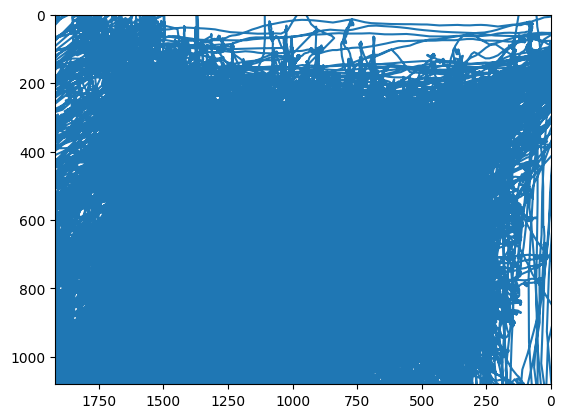

In [244]:
plt.plot(df_eye.X, df_eye.Y)
plt.xlim(0,1920)
plt.ylim(0,1080)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

In [250]:
xedges

array([-711.        , -640.66200195, -570.32400391, -499.98600586,
       -429.64800781, -359.31000977, -288.97201172, -218.63401367,
       -148.29601562,  -77.95801758,   -7.62001953,   62.71797852,
        133.05597656,  203.39397461,  273.73197266,  344.0699707 ,
        414.40796875,  484.7459668 ,  555.08396484,  625.42196289,
        695.75996094,  766.09795898,  836.43595703,  906.77395508,
        977.11195313, 1047.44995117, 1117.78794922, 1188.12594727,
       1258.46394531, 1328.80194336, 1399.13994141, 1469.47793945,
       1539.8159375 , 1610.15393555, 1680.49193359, 1750.82993164,
       1821.16792969, 1891.50592773, 1961.84392578, 2032.18192383,
       2102.51992187, 2172.85791992, 2243.19591797, 2313.53391602,
       2383.87191406, 2454.20991211, 2524.54791016, 2594.8859082 ,
       2665.22390625, 2735.5619043 , 2805.89990234])

In [260]:
df_eye = df_eye[(df_eye.X >= 0) &(df_eye.X <= 1920)]
df_eye = df_eye[(df_eye.Y >= 0) &(df_eye.Y <= 1080)]

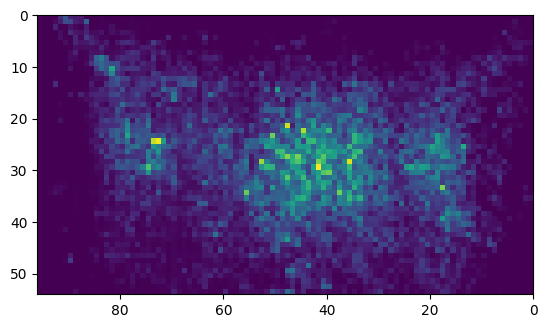

In [264]:
heatmap, xedges, yedges = np.histogram2d(df_eye.X, df_eye.Y, bins=(192//2, 108//2))
extent = [0, 192//2, 0, 108//2]
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
# plt.xlim(0,1920)
# plt.ylim(0,1080)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

In [203]:
df_click_filtered.head()

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml,Timestampdiff,SameURL,SameTarget
9,1684764738317,click,7dac1227-4da1-4a08-b81d-9c198305cbef,1067.0,881.0,https://www.amazon.com/s?k=dumbbell+weights&sp...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:19,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",NaN,False,False
21,1684764752618,click,0fa153b7-1ab8-4bdc-8cfa-23a2c6c5acdc,1114.0,435.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:33,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",14301.0,False,False
30,1684764765141,click,806a2f83-a598-407e-abdf-01db0e526f4f,1133.0,812.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:45,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",12523.0,False,False
39,1684764778222,click,a0ba9819-2822-4f2a-b48d-5cc277b512f3,972.0,947.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:59,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",13081.0,False,False
43,1684764784849,click,18628d22-5fca-42d2-b8d3-0fa545d56b33,968.0,962.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:13:05,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",6627.0,True,False


# Create Training Data

In [292]:
def clickOccuredinWindow(WindowMin, WindowMax):
    df_labels_tmp = df[(df.Timestamp > WindowMin) & (df.Timestamp < WindowMax)]
    # If atleast one click occured in that time the resulting df has more than 0 entries. the label is then 1
    if len(df_labels_tmp) > 0:
        return 1
    return 0

In [297]:
window_size = 1000
stride = window_size
x_train = []
y_train = []
# for i in range(0,len(df_eye), stride):
for i in range(0,10000, stride):
    df_window = df_eye.iloc[i:i+window_size]

    x_train.append(df_window[["X","Y"]].values)
    y_train.append(clickOccuredinWindow(df_window.Timestamp.min(), df_window.Timestamp.max()))
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
# Reshape Dense to (SampleAmount, Data) as Dense layers only take 1D input
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
print(x_train.shape)
y_train.shape

(10, 1000, 2)
(10, 2000)


(10,)

In [298]:
y_train

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

# TODO:
- extract x,y coords and width, heigth, and customuuid of all elements in the CurrentHTML
- create trainings data and labels with windows. Use a stride = window_size to reduce dataamount
- extract the clickable HTML elements -> these are the potential clicks 
- extract the actually clicked HTML elements (with the UUID in "CurrentTarget")
- filter data (maybe there are 3 clicks very close to each other because of the slow internet) 
- HTML Y coordinates have to be moved down by 71px, so 0,0 of eye and mouse matches (So the current (0,0) is (71,0))
- Timestamps between eye and mouse data have to be synced.
- One hot encoding, either a click or no click

# Goal: Train a first basic fully connected neural network which detects if did a click happen during the time window based on eye tracking data

In [237]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()


model.add(Dense(units=64, activation='relu', input_shape=(window_size*2,)))  # Replace input_dim with the appropriate input shape
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                6464      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


If you want to train LSTMs you probably need to use a datagenerator to generate the windows you use for training before each batch. 

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(x_train, y_train, epochs=10
          , batch_size=32, validation_split=0.2)